In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

ImportError: cannot import name 'csr_array' from 'scipy.sparse' (c:\Users\Ahmed Ashraf\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\__init__.py)

In [ ]:
import cv2

# Load the image
image = cv2.imread("images\resized.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the shapes in the binary image
contours, _ = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a new image
contour_img = cv2.drawContours(image.copy(), contours, -1, (0, 0, 255), 2)

# Find the outermost contour to get the edge of the shape
outer_contour = max(contours, key=cv2.contourArea)

# Draw the outer contour on the image
edge_img = cv2.drawContours(image.copy(), [outer_contour], -1, (0, 255, 0), 2)

# Show the images
cv2.imshow("Contours", contour_img)
cv2.imshow("Edge", edge_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import cv2

# Read image
img = cv2.imread('images\resized.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# Display the result
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import numpy as np
from skimage import io
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Read input image and convert it to grayscale
img = io.imread('R.png', as_gray=True)

# Preprocess image with Gaussian filter to reduce noise and enhance edges
img = gaussian(img, sigma=1)

# Initialize snake contour using a rectangular bounding box
x = np.linspace(50, 150, 100)
y = np.linspace(50, 150, 100)
X, Y = np.meshgrid(x, y)
init_contour = np.array([np.ravel(X), np.ravel(Y)]).T

# Define parameters for active contour model
alpha = 0.1  # coefficient for elasticity (stretching) energy
beta = 1.0   # coefficient for curvature energy
gamma = 0.01  # coefficient for image energy
max_iterations = 500

# Evolve snake contour using active contour model with greedy algorithm
snake_contour = active_contour(
    gamma * img, init_contour, alpha, beta, max_iterations, 'greedy')

# Convert snake contour to chain code
chain_code = []
for i in range(snake_contour.shape[0]-1):
    dx = snake_contour[i+1, 0] - snake_contour[i, 0]
    dy = snake_contour[i+1, 1] - snake_contour[i, 1]
    code = int(np.arctan2(dy, dx) / np.pi * 4) % 8
    chain_code.append(code)

# Compute perimeter of snake contour using chain code
perimeter = len(chain_code)

print("Chain Code: ", chain_code)
print("Perimeter: ", perimeter)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

In [ ]:
import cv2

# read the binary image
img = cv2.imread('R.png', cv2.IMREAD_GRAYSCALE)

# compute the perimeter using cv2.findContours()
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
perimeter = cv2.arcLength(contours[0], True)

print("Perimeter:", perimeter)


Perimeter: 6627.602825641632


In [ ]:
import cv2
import numpy as np

# read the image
img = cv2.imread('images\messi.jpg')
# create a copy of the original image
output = img.copy()


# convert the image to grayscale
gray = cv2.imread('images\messi.jpg', 0)

# apply Canny edge detection to find the edges of the object
edges = cv2.Canny(gray, 100, 200)

# create an initial contour using the edges
contours, hierarchy = cv2.findContours(
    edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

# create an empty chain code list
chain_code = []

# get the starting point of the contour
start_point = tuple(cnt[0][0])

# add the starting point to the chain code list
chain_code.append(start_point)

# iterate through the contour and compute the chain code
for i in range(1, len(cnt)):
    # get the current point on the contour
    current_point = tuple(cnt[i][0])

    # compute the difference between the current point and the previous point
    diff = tuple(np.subtract(current_point, start_point))

    # convert the difference to a chain code
    if diff == (1, 0):
        chain_code.append(0)
    elif diff == (1, 1):
        chain_code.append(1)
    elif diff == (0, 1):
        chain_code.append(2)
    elif diff == (-1, 1):
        chain_code.append(3)
    elif diff == (-1, 0):
        chain_code.append(4)
    elif diff == (-1, -1):
        chain_code.append(5)
    elif diff == (0, -1):
        chain_code.append(6)
    elif diff == (1, -1):
        chain_code.append(7)

    # update the starting point
    start_point = current_point


# evolve the contour using the snake algorithm
alpha = 0.1
beta = 0.2
gamma = 10.0
iterations = 100

for i in range(iterations):
    # compute the internal energy of the contour
    internal_energy = cv2.contourArea(cnt)

    # compute the external energy of the contour
    external_energy = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    external_energy = cv2.distanceTransform(255 - edges, cv2.DIST_L2, 5)
    external_energy = cv2.cvtColor(
        external_energy.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # compute the total energy of the contour
    energy = alpha * internal_energy + beta * external_energy

    # compute the gradient of the energy
    gradient = cv2.GaussianBlur(energy, (3, 3), 0)
    gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)

    # update the contour using the gradient
    snake = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    snake = cv2.Laplacian(snake, cv2.CV_32F)
    snake = cv2.convertScaleAbs(snake)
    snake = cv2.addWeighted(snake, gamma, gradient, -gamma, 0)
    snake = cv2.threshold(snake, 0, 255, cv2.THRESH_BINARY)[1]
    snake = cv2.erode


error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import active_contour
from skimage.io import imread

# Load image
image = imread('images/coins.jpg', as_gray= True)

# Initialize snake
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 50*np.sin(s)
c = 220 + 50*np.cos(s)
init = np.array([r, c]).T

# Apply active contour model
snake = active_contour(image, init, alpha=0.1, beta=1.0, gamma=0.01)
print(snake.shape)

# Display result
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()


ImportError: cannot import name 'csr_array' from 'scipy.sparse' (c:\Users\Ahmed Ashraf\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\__init__.py)

In [33]:
import numpy as np
import cv2


class RegionGrowing:
    def __init__(self) -> None:
        self.finalImage = None

    def getGrayDiff(self, img, currentPoint, tmpPoint):
        return abs(int(img[currentPoint.x, currentPoint.y]) - int(img[tmpPoint.x, tmpPoint.y]))

    def selectConnects(self, p):
        if p != 0:
            connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1),
                        Point(0, 1), Point(-1, 1), Point(-1, 0)]
        else:
            connects = [Point(0, -1), Point(1, 0), Point(0, 1), Point(-1, 0)]
        return connects

    def fit(self, image, seeds, thresh, p=1):
        seeds = [Point(point[0], point[1]) for point in seeds]
        img = image
        height, weight = img.shape
        seedMark = np.zeros(img.shape)
        seedList = []
        for seed in seeds:
            seedList.append(seed)
        label = 1
        connects = self.selectConnects(p)
        while(len(seedList) > 0):
            currentPoint = seedList.pop(0)
            seedMark[currentPoint.x, currentPoint.y] = label
            for i in range(8):
                tmpX = currentPoint.x + connects[i].x
                tmpY = currentPoint.y + connects[i].y
                if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                    continue
                grayDiff = self.getGrayDiff(
                    img, currentPoint, Point(tmpX, tmpY))
                if grayDiff < thresh and seedMark[tmpX, tmpY] == 0:
                    seedMark[tmpX, tmpY] = label
                    seedList.append(Point(tmpX, tmpY))
        self.finalImage = seedMark

    def show_masked_image(self):
        cv2.imshow('Output', self.finalImage)
        cv2.waitKey(0)



class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def getX(self):
        return self.x

    def getY(self):
        return self.y


def region_growing(image, seeds, threshold):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    region = RegionGrowing()
    region.fit(img, seeds, threshold)
    return region.finalImage


if __name__ == "__main__":
    seeds = [[10, 10], [82, 150], [20, 300]]
    image = cv2.imread("images/coins.jpg")
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    region = RegionGrowing()
    region.fit(img, seeds, 6)
    region.show_masked_image()


C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_32308\411388964.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.zeros((N, N), dtype=np.float)


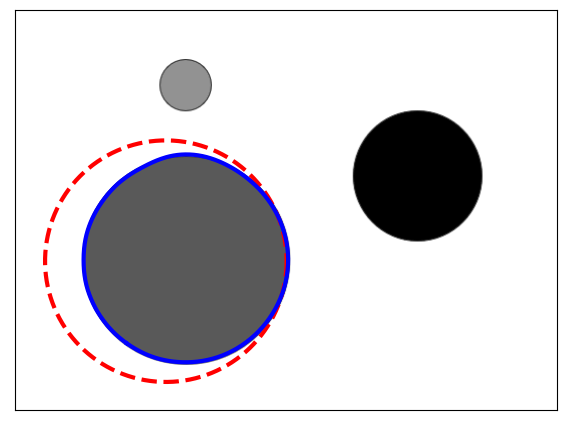

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.filters as filt


def snake(img, x, y, alpha=0.001, beta=0.4, gamma=100,sigma=20, iterations=500):
    """
    The snake algorithm to segment image
    
    Parameters
    ------
    img : ndarray
        input image
    
    ------
    x,y : ndarry
        X-coordinate and Y-coordinate of the initial contour
    alpha,beta: number
        The set of parameters of internal energy
    gamma : number
        Parameter cotrolling the external engery
    sigma : number
        Standard deviation
    iterations : number
        The number of iteration
    """

    # compute the matrix
    N = np.size(x)
    a = gamma*(2*alpha+6*beta)+1
    b = gamma*(-alpha-4*beta)
    c = gamma*beta
    p = np.zeros((N, N), dtype=np.float)
    p[0] = np.c_[a, b, c, np.zeros((1, N-5)), c, b]

    for i in range(N):
        p[i] = np.roll(p[0], i)
    p = np.linalg.inv(p)
    # filter the image
    smoothed = cv2.GaussianBlur((img-img.min()) / (img.max()-img.min()), (89, 89), sigma)
    giy, gix = np.gradient(smoothed)
    gmi = (gix**2+giy**2)**0.5
    gmi = (gmi - gmi.min()) / (gmi.max() - gmi.min())
    Iy, Ix = np.gradient(gmi)

    # avoid the curvature evolve to the outside of the image
    def fmax(x, y):
        x[x < 0] = 0
        y[y < 0] = 0
        x[x > img.shape[1]-1] = img.shape[1]-1
        y[y > img.shape[0]-1] = img.shape[0]-1
        return y.round().astype(int), x.round().astype(int)
    for i in range(iterations):
        fex = Ix[fmax(x, y)]
        fey = Iy[fmax(x, y)]
        x = np.dot(p, x + gamma*fex)
        y = np.dot(p, y + gamma*fey)
    return x, y


image = cv2.imread("static\images\circles.png", cv2.IMREAD_GRAYSCALE)
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

v = 250 + 120*np.sin(s)
p = 150 + 120*np.cos(s)
init2 = np.array([v, p]).T

x, y = snake(image, r, c, alpha=0.01, beta=1,gamma=1000, sigma=20, iterations=100)
# Display result
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init2[:, 1], init2[:, 0], '--r', lw=3)
ax.plot (x,y, '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()



C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_32308\3191375154.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.array(image, dtype=np.float)


TypeError: Invalid shape () for image data

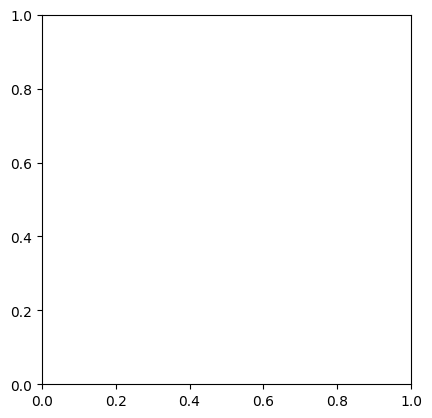

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#read the image
image = cv2.imread("images\coins.jpg", cv2.IMREAD_GRAYSCALE)
img = np.array(image, dtype=np.float)
#define the initial snake
t = np.linspace(0, 2*np.pi, 60, endpoint=True)
x_0 = 300+30*np.sin(t)
y_0 = 300+30*np.cos(t)
#plot the image and results
plt.imshow(img, cmap='gray')
x_1, y_1 = snake(img, x_0, y_0)
plt.plot(x_0, y_0, '.')
plt.plot(x_1, y_1, '.')
plt.show()




In [49]:
import numpy as np
import skimage.filters as filt
import cv2


def create_A(a, b, N):
    """
    a: float
    alpha parameter

    b: float
    beta parameter

    N: int
    N is the number of points sampled on the snake curve: (x(p_i), y(p_i)), i=0,...,N-1
    """
    row = np.r_[
        -2*a - 6*b,
        a + 4*b,
        -b,
        np.zeros(N-5),
        -b,
        a + 4*b
    ]
    A = np.zeros((N, N))
    for i in range(N):
        A[i] = np.roll(row, i)
    return A


def create_external_edge_force_gradients_from_img(img, sigma=30):
    """
    Given an image, returns 2 functions, fx & fy, that compute
    the gradient of the external edge force in the x and y directions.

    img: ndarray
        The image.
    """
    # Gaussian smoothing.
    smoothed = cv2.GaussianBlur(
        (img-img.min()) / (img.max()-img.min()), (89, 89), sigma)
    # Gradient of the image in x and y directions.
    giy, gix = np.gradient(smoothed)
    # Gradient magnitude of the image.
    gmi = (gix**2 + giy**2)**(0.5)
    # Normalize. This is crucial (empirical observation).
    gmi = (gmi - gmi.min()) / (gmi.max() - gmi.min())

    # Gradient of gradient magnitude of the image in x and y directions.
    ggmiy, ggmix = np.gradient(gmi)

    def fx(x, y):
        """
        Return external edge force in the x direction.

        x: ndarray
            numpy array of floats.
        y: ndarray:
            numpy array of floats.
        """
        # Check bounds.  
        x[x < 0] = 0.
        y[y < 0] = 0.

        x[x > img.shape[1]-1] = img.shape[1]-1
        y[y > img.shape[0]-1] = img.shape[0]-1

        return ggmix[(y.round().astype(int), x.round().astype(int))]

    def fy(x, y):
        """
        Return external edge force in the y direction.

        x: ndarray
            numpy array of floats.
        y: ndarray:
            numpy array of floats.
        """
        # Check bounds.
        x[x < 0] = 0.
        y[y < 0] = 0.

        x[x > img.shape[1]-1] = img.shape[1]-1
        y[y > img.shape[0]-1] = img.shape[0]-1

        return ggmiy[(y.round().astype(int), x.round().astype(int))]

    return fx, fy


def iterate_snake(x, y, a, b, fx, fy, gamma=0.1, n_iters=10, return_all=True):
    """
    x: ndarray
        intial x coordinates of the snake

    y: ndarray
        initial y coordinates of the snake

    a: float
        alpha parameter

    b: float
        beta parameter

    fx: callable
        partial derivative of first coordinate of external energy function. This is the first element of the gradient of the external energy.

    fy: callable
        see fx.

    gamma: float
        step size of the iteration
    
    n_iters: int
        number of times to iterate the snake

    return_all: bool
        if True, a list of (x,y) coords are returned corresponding to each iteration.
        if False, the (x,y) coords of the last iteration are returned.
    """
    A = create_A(a, b, x.shape[0])
    B = np.linalg.inv(np.eye(x.shape[0]) - gamma*A)
    if return_all:
        snakes = []

    for i in range(n_iters):
        x_ = np.dot(B, x + gamma*fx(x, y))
        y_ = np.dot(B, y + gamma*fy(x, y))
        x, y = x_.copy(), y_.copy()
        if return_all:
            snakes.append((x_.copy(), y_.copy()))

    if return_all:
        return snakes
    else:
        return (x, y)


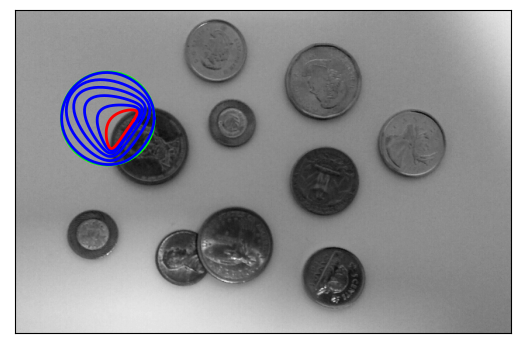

In [52]:
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('static/images/coins.jpg', 0)

t = np.arange(0, 2*np.pi, 0.1)
x = 120+60*np.cos(t)
y = 140+60*np.sin(t)

alpha = 0.001
beta = 0.4
gamma = 100
iterations = 50

# fx and fy are callable functions
fx, fy = create_external_edge_force_gradients_from_img(img)

snakes = iterate_snake(
    x=x,
    y=y,
    a=alpha,
    b=beta,
    fx=fx,
    fy=fy,
    gamma=gamma,
    n_iters=iterations,
    return_all=True
)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img, cmap=plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)
ax.plot(np.r_[x, x[0]], np.r_[y, y[0]], c=(0, 1, 0), lw=2)

for i, snake in enumerate(snakes):
    if i % 10 == 0:
        ax.plot(np.r_[snake[0], snake[0][0]], np.r_[
                snake[1], snake[1][0]], c=(0, 0, 1), lw=2)

# Plot the last one a different color.
ax.plot(np.r_[snakes[-1][0], snakes[-1][0][0]],
        np.r_[snakes[-1][1], snakes[-1][1][0]], c=(1, 0, 0), lw=2)

plt.show()


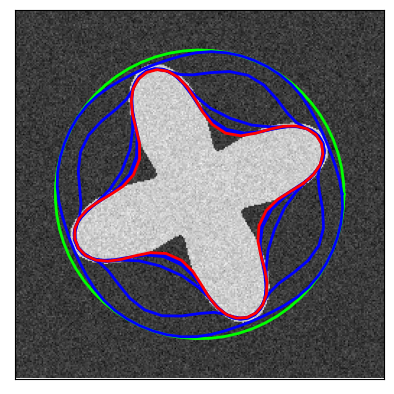

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.mgrid[-4:4:256j, -4:4:256j]
rad = (x**2 + y**2)**0.5
tht = np.arctan2(y, x)
# A 4-lobed shape.
img = (rad <= (2 + np.sin(4*tht))).astype(float) + \
    0.1*np.random.randn(x.shape[0], x.shape[1])

t = np.arange(0, 2*np.pi, 0.1)
x = 128+100*np.cos(t)
y = 128+100*np.sin(t)

alpha = 0.001
beta = 0.01
gamma = 100
iterations = 50

# fx and fy are callable functions
fx, fy = create_external_edge_force_gradients_from_img(img, sigma=10)

snakes = iterate_snake(
    x=x,
    y=y,
    a=alpha,
    b=beta,
    fx=fx,
    fy=fy,
    gamma=gamma,
    n_iters=iterations,
    return_all=True
)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img, cmap=plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)
ax.plot(np.r_[x, x[0]], np.r_[y, y[0]], c=(0, 1, 0), lw=2)

for i, snake in enumerate(snakes):
    if i % 10 == 0:
        ax.plot(np.r_[snake[0], snake[0][0]], np.r_[
                snake[1], snake[1][0]], c=(0, 0, 1), lw=2)

# Plot the last one a different color.
ax.plot(np.r_[snakes[-1][0], snakes[-1][0][0]],
        np.r_[snakes[-1][1], snakes[-1][1][0]], c=(1, 0, 0), lw=2)

plt.show()


In [12]:
import numpy as np
from scipy.interpolate import RectBivariateSpline
from skimage._shared.utils import _supported_float_type
from skimage.util import img_as_float
from skimage.filters import sobel


def active_contour(image, snake, alpha=0.01, beta=0.1,w_line=0, w_edge=1, gamma=0.01,max_px_move=1.0,max_num_iter=2500, convergence=0.1,*,boundary_condition='periodic'):
    """Active contour model.
    Active contours by fitting snakes to features of images. Supports single
    and multichannel 2D images. Snakes can be periodic (for segmentation) or
    have fixed and/or free ends.
    The output snake has the same length as the input boundary.
    As the number of points is constant, make sure that the initial snake
    has enough points to capture the details of the final contour.
    Parameters
    ----------
    image : (N, M) or (N, M, 3) ndarray
        Input image.
    snake : (N, 2) ndarray
        Initial snake coordinates. For periodic boundary conditions, endpoints
        must not be duplicated.
    alpha : float, optional
        Snake length shape parameter. Higher values makes snake contract
        faster.
    beta : float, optional
        Snake smoothness shape parameter. Higher values makes snake smoother.
    w_line : float, optional
        Controls attraction to brightness. Use negative values to attract
        toward dark regions.
    w_edge : float, optional
        Controls attraction to edges. Use negative values to repel snake from
        edges.
    gamma : float, optional
        Explicit time stepping parameter.
    max_px_move : float, optional
        Maximum pixel distance to move per iteration.
    max_num_iter : int, optional
        Maximum iterations to optimize snake shape.
    convergence : float, optional
        Convergence criteria.
    boundary_condition : string, optional
        Boundary conditions for the contour. Can be one of 'periodic',
        'free', 'fixed', 'free-fixed', or 'fixed-free'. 'periodic' attaches
        the two ends of the snake, 'fixed' holds the end-points in place,
        and 'free' allows free movement of the ends. 'fixed' and 'free' can
        be combined by parsing 'fixed-free', 'free-fixed'. Parsing
        'fixed-fixed' or 'free-free' yields same behaviour as 'fixed' and
        'free', respectively.
    Returns
    -------
    snake : (N, 2) ndarray
        Optimised snake, same shape as input parameter.
    References
    ----------
    .. [1]  Kass, M.; Witkin, A.; Terzopoulos, D. "Snakes: Active contour
            models". International Journal of Computer Vision 1 (4): 321
            (1988). :DOI:`10.1007/BF00133570`
    Examples
    --------
    >>> from skimage.draw import circle_perimeter
    >>> from skimage.filters import gaussian
    Create and smooth image:
    >>> img = np.zeros((100, 100))
    >>> rr, cc = circle_perimeter(35, 45, 25)
    >>> img[rr, cc] = 1
    >>> img = gaussian(img, 2, preserve_range=False)
    Initialize spline:
    >>> s = np.linspace(0, 2*np.pi, 100)
    >>> init = 50 * np.array([np.sin(s), np.cos(s)]).T + 50
    Fit spline to image:
    >>> snake = active_contour(img, init, w_edge=0, w_line=1, coordinates='rc')  # doctest: +SKIP
    >>> dist = np.sqrt((45-snake[:, 0])**2 + (35-snake[:, 1])**2)  # doctest: +SKIP
    >>> int(np.mean(dist))  # doctest: +SKIP
    25
    """
    max_num_iter = int(max_num_iter)
    if max_num_iter <= 0:
        raise ValueError("max_num_iter should be >0.")
    convergence_order = 10
    valid_bcs = ['periodic', 'free', 'fixed', 'free-fixed',
                'fixed-free', 'fixed-fixed', 'free-free']
    if boundary_condition not in valid_bcs:
        raise ValueError("Invalid boundary condition.\n" +
                        "Should be one of: "+", ".join(valid_bcs)+'.')
    img = img_as_float(image)
    float_dtype = _supported_float_type(image.dtype)
    img = img.astype(float_dtype, copy=False)
    RGB = img.ndim == 3
    # Find edges using sobel:
    if w_edge != 0:
        if RGB:
            edge = [sobel(img[:, :, 0]), sobel(img[:, :, 1]),
                    sobel(img[:, :, 2])]
        else:
            edge = [sobel(img)]
    else:
        edge = [0]
    # Superimpose intensity and edge images:
    if RGB:
        img = w_line*np.sum(img, axis=2) \
            + w_edge*sum(edge)
    else:
        img = w_line*img + w_edge*edge[0]
    # Interpolate for smoothness:
    intp = RectBivariateSpline(np.arange(img.shape[1]),
                            np.arange(img.shape[0]),
                            img.T, kx=2, ky=2, s=0)
    snake_xy = snake[:, ::-1]
    x = snake_xy[:, 0].astype(float_dtype)
    y = snake_xy[:, 1].astype(float_dtype)
    n = len(x)
    xsave = np.empty((convergence_order, n), dtype=float_dtype)
    ysave = np.empty((convergence_order, n), dtype=float_dtype)
    # Build snake shape matrix for Euler equation in double precision
    eye_n = np.eye(n, dtype=float)
    a = (np.roll(eye_n, -1, axis=0)
        + np.roll(eye_n, -1, axis=1)
         - 2 * eye_n)  # second order derivative, central difference
    b = (np.roll(eye_n, -2, axis=0)
        + np.roll(eye_n, -2, axis=1)
         - 4 * np.roll(eye_n, -1, axis=0)
         - 4 * np.roll(eye_n, -1, axis=1)
         + 6 * eye_n)  # fourth order derivative, central difference
    A = -alpha * a + beta * b

    # Impose boundary conditions different from periodic:
    sfixed = False
    if boundary_condition.startswith('fixed'):
        A[0, :] = 0
        A[1, :] = 0
        A[1, :3] = [1, -2, 1]
        sfixed = True
    efixed = False
    if boundary_condition.endswith('fixed'):
        A[-1, :] = 0
        A[-2, :] = 0
        A[-2, -3:] = [1, -2, 1]
        efixed = True
    sfree = False
    if boundary_condition.startswith('free'):
        A[0, :] = 0
        A[0, :3] = [1, -2, 1]
        A[1, :] = 0
        A[1, :4] = [-1, 3, -3, 1]
        sfree = True
    efree = False
    if boundary_condition.endswith('free'):
        A[-1, :] = 0
        A[-1, -3:] = [1, -2, 1]
        A[-2, :] = 0
        A[-2, -4:] = [-1, 3, -3, 1]
        efree = True

    # Only one inversion is needed for implicit spline energy minimization:
    inv = np.linalg.inv(A + gamma * eye_n)
    # can use float_dtype once we have computed the inverse in double precision
    inv = inv.astype(float_dtype, copy=False)

    # Explicit time stepping for image energy minimization:
    for i in range(max_num_iter):
        # RectBivariateSpline always returns float64, so call astype here
        fx = intp(x, y, dx=1, grid=False).astype(float_dtype, copy=False)
        fy = intp(x, y, dy=1, grid=False).astype(float_dtype, copy=False)

        if sfixed:
            fx[0] = 0
            fy[0] = 0
        if efixed:
            fx[-1] = 0
            fy[-1] = 0
        if sfree:
            fx[0] *= 2
            fy[0] *= 2
        if efree:
            fx[-1] *= 2
            fy[-1] *= 2
        xn = inv @ (gamma*x + fx)
        yn = inv @ (gamma*y + fy)

        # Movements are capped to max_px_move per iteration:
        dx = max_px_move * np.tanh(xn - x)
        dy = max_px_move * np.tanh(yn - y)
        if sfixed:
            dx[0] = 0
            dy[0] = 0
        if efixed:
            dx[-1] = 0
            dy[-1] = 0
        x += dx
        y += dy

        # Convergence criteria needs to compare to a number of previous
        # configurations since oscillations can occur.
        j = i % (convergence_order + 1)
        if j < convergence_order:
            xsave[j, :] = x
            ysave[j, :] = y
        else:
            dist = np.min(np.max(np.abs(xsave - x[None, :])
                                + np.abs(ysave - y[None, :]), 1))
            if dist < convergence:
                break
    return np.stack([y, x], axis=1)


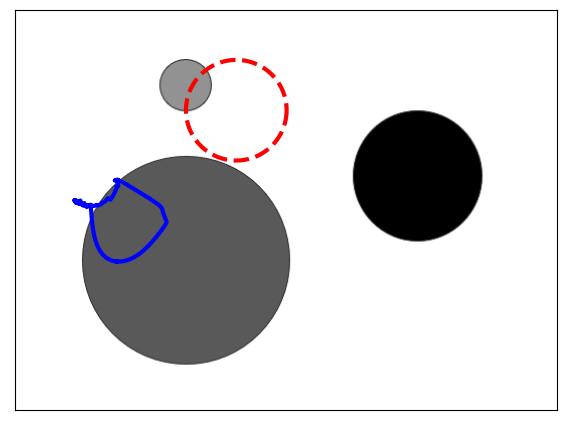

In [20]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("static/images/circles.png",0)
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 50*np.sin(s)
c = 220 + 50*np.cos(s)
init = np.array([r, c]).T
arr = active_contour(image,init)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(arr[:, 0],arr[: ,1] , '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()